In [ ]:
python --version

Preparing the tools

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
# from sklearn.metrics import plot_roc_curve # note: this was changed in Scikit-Learn 1.2+ to be "RocCurveDisplay" (see below)
from sklearn.metrics import RocCurveDisplay # new in Scikit-Learn 1.2+


In [4]:
df = pd.read_csv(r"C:\Users\navad\Desktop\1.Titanic_Kaggle_begginer_level_comp\train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.shape #(rows,columns)

(891, 12)

In [6]:
df.Survived.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [7]:
df.Survived.value_counts(normalize=True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

<Axes: xlabel='Survived'>

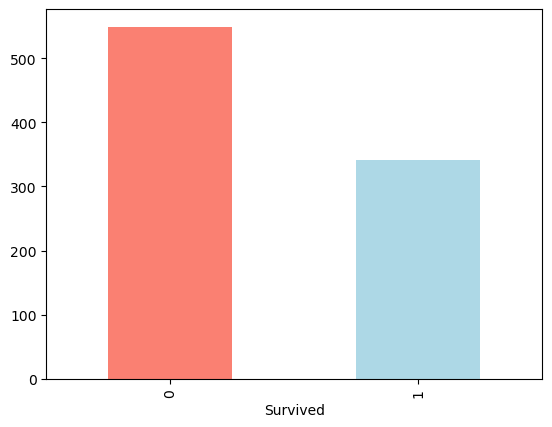

In [8]:
df.Survived.value_counts().plot(kind = "bar",color = ["salmon","lightblue"])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
pd.crosstab(index = df.Survived, columns = df.Sex)

Sex,female,male
Survived,,
0,81,468
1,233,109


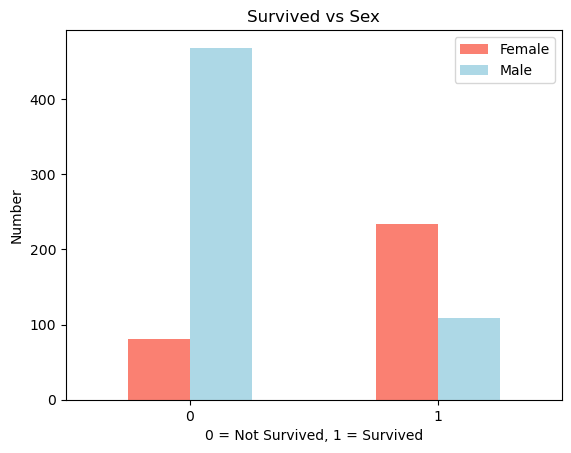

In [11]:
pd.crosstab(index = df.Survived, columns = df.Sex).plot(kind = "bar", color = ["salmon","lightblue"])
# Add some attributes to it
plt.title("Survived vs Sex")
plt.xlabel("0 = Not Survived, 1 = Survived")
plt.ylabel("Number")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0); # keep the labels on the x-axis vertical

In [12]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
pd.crosstab(index = df.Survived, columns = df.Pclass)

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


<Axes: xlabel='Survived'>

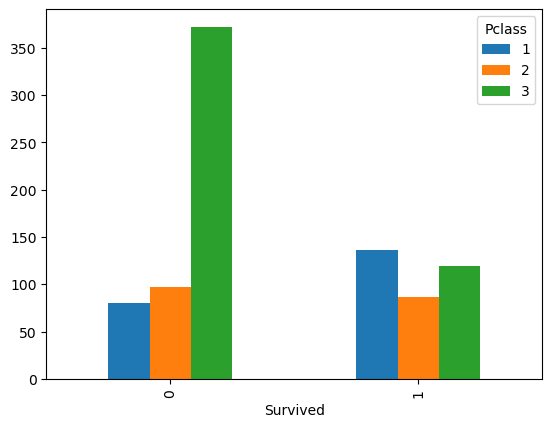

In [14]:
pd.crosstab(index = df.Survived, columns = df.Pclass).plot(kind = "bar")

In [15]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
pd.crosstab(index = df.Survived, columns = df.Age)

Age,0.42,0.67,0.75,0.83,0.92,1.00,2.00,3.00,4.00,5.00,...,62.00,63.00,64.00,65.00,66.00,70.00,70.50,71.00,74.00,80.00
Survived,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,2,7,1,3,0,...,2,0,2,3,1,2,1,2,1,0
1,1,1,2,2,1,5,3,5,7,4,...,2,2,0,0,0,0,0,0,0,1


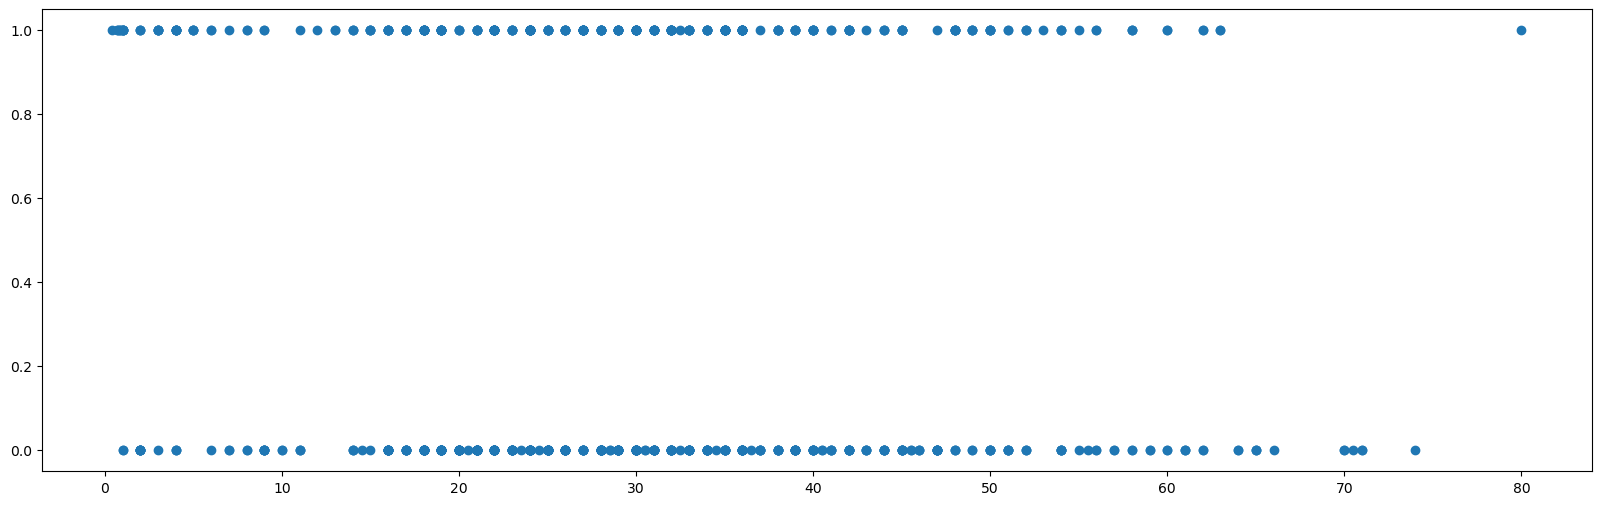

In [17]:
plt.figure(figsize = (20,6))
plt.scatter(df.Age,df.Survived)

In [18]:
pd.crosstab(index = df.Survived, columns = df.Cabin)

Cabin,A10,A14,A16,A19,A20,A23,A24,A26,A31,A32,...,E8,F E69,F G63,F G73,F2,F33,F38,F4,G6,T
Survived,,,,,,,,,,,,,,,,,,,,,
0,1,1,0,1,0,0,1,0,0,1,...,0,0,1,2,1,0,1,0,2,1
1,0,0,1,0,1,1,0,1,1,0,...,2,1,0,0,2,3,0,2,2,0


In [19]:
df.drop(labels = "Name", axis = 1, inplace = True)
df.drop(labels = "Ticket", axis = 1, inplace = True)
df.drop(labels = "Fare", axis = 1, inplace = True)
df.drop(labels = "Cabin", axis = 1, inplace = True)
df.drop(labels = "Embarked", axis = 1, inplace = True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
0,1,0,3,male,22.0,1,0
1,2,1,1,female,38.0,1,0
2,3,1,3,female,26.0,0,0
3,4,1,1,female,35.0,1,0
4,5,0,3,male,35.0,0,0


In [20]:
df["Sex"] = df["Sex"].map({'male': 1, 'female': 0})
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
0,1,0,3,1,22.0,1,0
1,2,1,1,0,38.0,1,0
2,3,1,3,0,26.0,0,0
3,4,1,1,0,35.0,1,0
4,5,0,3,1,35.0,0,0


In [21]:
corr_matrix = df.corr()
corr_matrix

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.036847,-0.057527,-0.001652
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.369226,0.083081,0.018443
Sex,0.042939,-0.543351,0.131900,1.000000,0.093254,-0.114631,-0.245489
Age,0.036847,-0.077221,-0.369226,0.093254,1.000000,-0.308247,-0.189119
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.308247,1.000000,0.414838
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.189119,0.414838,1.000000


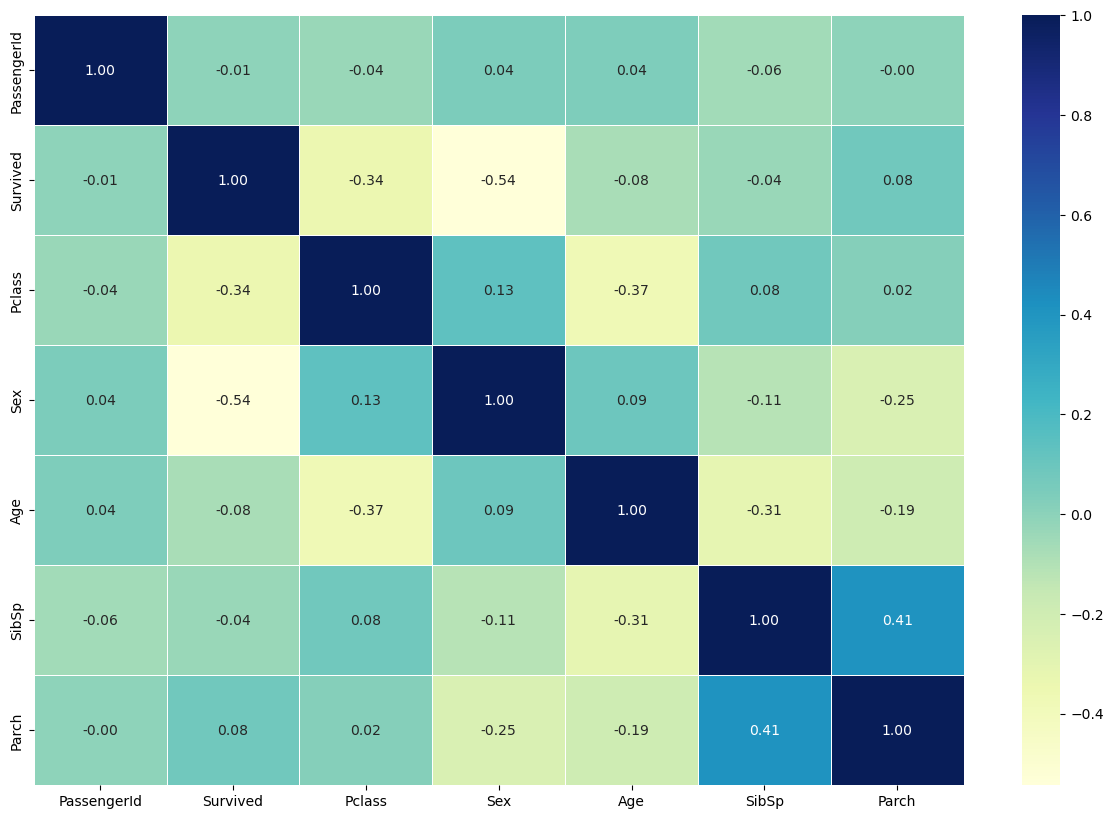

In [22]:
corr_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu");

Modelling

In [23]:
X_train = df.drop(labels = "Survived", axis = 1)
Y_train = df.Survived.to_numpy()

In [24]:
X_train.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch
0,1,3,1,22.0,1,0
1,2,1,0,38.0,1,0
2,3,3,0,26.0,0,0
3,4,1,0,35.0,1,0
4,5,3,1,35.0,0,0


In [25]:
Y,type(Y)

NameError: name 'Y' is not defined

In [29]:
X_test = pd.read_csv(r"C:\Users\navad\Desktop\1.Titanic_Kaggle_begginer_level_comp\test.csv")
X_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [30]:
X_train.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch
0,1,3,1,22.0,1,0
1,2,1,0,38.0,1,0
2,3,3,0,26.0,0,0
3,4,1,0,35.0,1,0
4,5,3,1,35.0,0,0


In [31]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    int64  
 3   Age          714 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 41.9 KB


In [32]:
X_train["Age"] = X_train["Age"].fillna(X_train["Age"].mean())

In [33]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 41.9 KB


In [34]:
model = LogisticRegression()
model.fit(X_train,Y_train)

C:\Users\navad\Desktop\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [35]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [36]:
X_test.drop(labels = "Name", axis = 1, inplace = True)
X_test.drop(labels = "Ticket", axis = 1, inplace = True)
X_test.drop(labels = "Fare", axis = 1, inplace = True)
X_test.drop(labels = "Cabin", axis = 1, inplace = True)
X_test.drop(labels = "Embarked", axis = 1, inplace = True)
X_test["Sex"] =X_test ["Sex"].map({'male': 1, 'female': 0})
X_test["Age"] = X_test["Age"].fillna(X_test["Age"].mean())

In [37]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 19.7 KB


In [38]:
Y_preds = model.predict(X_test)

In [39]:
pred_df = pd.DataFrame()
pred_df["PassengerId"] = X_test["PassengerId"]
pred_df["Survived"] = Y_preds
pred_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [42]:
pred_df.to_csv(r"C:\Users\navad\Desktop\1.Titanic_Kaggle_begginer_level_comp\Submission.csv")

In [46]:
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X_train,Y_train)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': X_test.PassengerId, 'Survived': predictions})
output.to_csv('submissionRFC.csv', index=False)

In [47]:
output

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
